Box Jenkins

8.6 Box-Jenkins

The procedure to analyze the time series loosely follows the procedure that is commonly called the Box-Jenkins procedure.

The procedure is based on the following steps:
  

1.   Plot the data and verify that it is stationary, remove trend, if necessary.If all values are positive, consider using the logarithm of the values.
2.   Determine seasonality or periodicity from spectral analysis (Fourier transform, FFT), autocorrelation or other information, for example a-priori knowledge.
3. Difference time series to remove seasonality and make it stationary.
4. Determine the order of the ARMA process from autocorrelation and partial autocorrelation plot of the remaining time series.
5. Check whether the model describes the data adequately. If the fit is unsatisfactory, possibly use more or different fit parameters.
6. Once the model is established we can use it to forecast how the system evolves into the future.

In [ ]:
#import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import norm
import sympy as sym
import statsmodels.api
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from sklearn.linear_model import LinearRegression
from statsmodels.stats.diagnostic import het_white
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

In [ ]:
df = pd.read_excel(r'/content/augmento_btc_returns.xlsx')
df.index = df['date']
df

,date,listing_close,returns,twitter_hacks,twitter_pessimistic_doubtful,twitter_banks,twitter_selling,twitter_market_manipulation,twitter_de_centralisation,twitter_angry,...,reddit_dip,reddit_launch,reddit_fomo_theme,reddit_advice_support,reddit_rebranding,reddit_wallet,reddit_good_news,reddit_problems_and_issues,reddit_mining,reddit_waiting
date,,,,,,,,,,,,,,,,,,,,,
2016-11-01 01:00:00,2016-11-01 01:00:00,706.00,NaN,0,0,0,1,0,0,0,...,0,1,0,13,0,0,4,1,3,3
2016-11-01 02:00:00,2016-11-01 02:00:00,709.99,-0.005636,1,0,0,1,0,1,0,...,0,0,0,10,0,2,1,1,0,1
2016-11-01 03:00:00,2016-11-01 03:00:00,708.54,0.002044,0,0,0,0,0,0,0,...,0,0,0,8,0,2,1,5,3,0
2016-11-01 04:00:00,2016-11-01 04:00:00,702.85,0.008063,0,0,1,0,0,0,0,...,0,0,0,4,0,1,1,0,0,0
2016-11-01 05:00:00,2016-11-01 05:00:00,708.50,-0.008007,0,0,0,0,0,0,0,...,0,0,0,3,0,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-23 11:00:00,2024-04-23 11:00:00,66064.00,0.002464,0,0,0,1,0,0,0,...,0,1,0,28,0,5,15,9,9,0
2024-04-23 12:00:00,2024-04-23 12:00:00,66137.00,-0.001104,0,0,0,0,0,0,0,...,3,1,0,33,0,8,10,5,6,1
2024-04-23 13:00:00,2024-04-23 13:00:00,66544.00,-0.006135,0,1,1,0,0,0,1,...,1,0,0,31,0,8,14,10,5,0


<Axes: title={'center': 'Price'}, xlabel='date'>

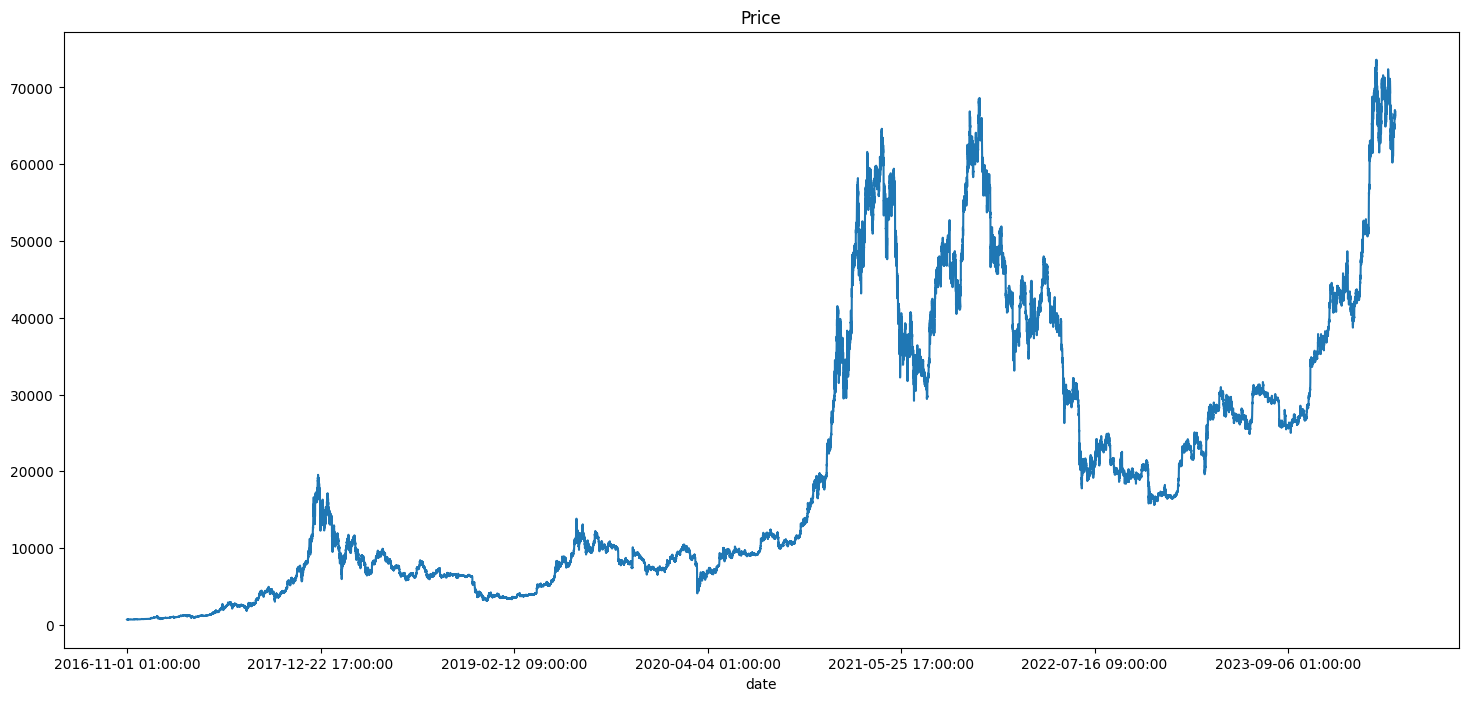

In [ ]:
df['listing_close'].plot(title = 'Price')

<Axes: title={'center': 'Returns'}, xlabel='date'>

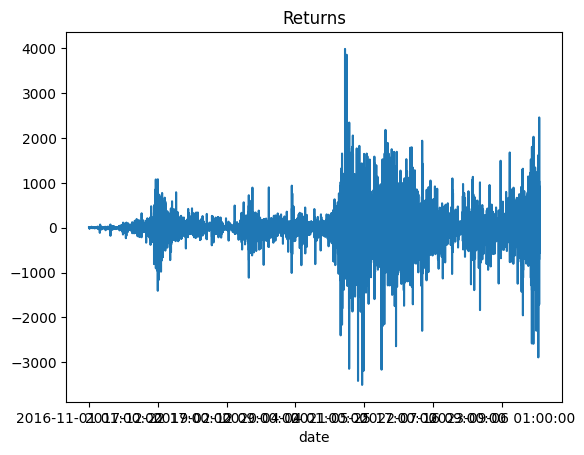

In [ ]:
df['returns'] = df['listing_close'] - df['listing_close'].shift(1)
df['returns'].plot(title = 'Returns')

In [ ]:
df

,date,listing_close,returns,twitter_hacks,twitter_pessimistic_doubtful,twitter_banks,twitter_selling,twitter_market_manipulation,twitter_de_centralisation,twitter_angry,...,reddit_dip,reddit_launch,reddit_fomo_theme,reddit_advice_support,reddit_rebranding,reddit_wallet,reddit_good_news,reddit_problems_and_issues,reddit_mining,reddit_waiting
date,,,,,,,,,,,,,,,,,,,,,
2016-11-01 01:00:00,2016-11-01 01:00:00,706.00,NaN,0,0,0,1,0,0,0,...,0,1,0,13,0,0,4,1,3,3
2016-11-01 02:00:00,2016-11-01 02:00:00,709.99,3.99,1,0,0,1,0,1,0,...,0,0,0,10,0,2,1,1,0,1
2016-11-01 03:00:00,2016-11-01 03:00:00,708.54,-1.45,0,0,0,0,0,0,0,...,0,0,0,8,0,2,1,5,3,0
2016-11-01 04:00:00,2016-11-01 04:00:00,702.85,-5.69,0,0,1,0,0,0,0,...,0,0,0,4,0,1,1,0,0,0
2016-11-01 05:00:00,2016-11-01 05:00:00,708.50,5.65,0,0,0,0,0,0,0,...,0,0,0,3,0,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-23 11:00:00,2024-04-23 11:00:00,66064.00,-163.00,0,0,0,1,0,0,0,...,0,1,0,28,0,5,15,9,9,0
2024-04-23 12:00:00,2024-04-23 12:00:00,66137.00,73.00,0,0,0,0,0,0,0,...,3,1,0,33,0,8,10,5,6,1
2024-04-23 13:00:00,2024-04-23 13:00:00,66544.00,407.00,0,1,1,0,0,0,1,...,1,0,0,31,0,8,14,10,5,0


In [ ]:
df.describe(include = 'all')

,date,listing_close,returns,twitter_hacks,twitter_pessimistic_doubtful,twitter_banks,twitter_selling,twitter_market_manipulation,twitter_de_centralisation,twitter_angry,...,reddit_dip,reddit_launch,reddit_fomo_theme,reddit_advice_support,reddit_rebranding,reddit_wallet,reddit_good_news,reddit_problems_and_issues,reddit_mining,reddit_waiting
count,65535,65480.000000,65474.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,...,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000
unique,65535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2016-11-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,20306.180519,0.997622,0.279423,0.496895,1.386801,1.619928,1.083650,0.834546,0.372915,...,1.385428,0.441001,0.451972,29.191012,0.028305,5.394293,12.342763,5.460533,5.466361,1.493996
std,NaN,17673.331995,197.741039,1.145163,0.841908,1.958483,2.047827,3.496982,1.277662,0.739968,...,3.259289,0.940096,0.901863,24.607571,0.188497,5.225403,10.453966,5.035804,5.047260,1.991603
min,NaN,675.480000,-3502.630000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,6674.972500,-32.627500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,15.000000,0.000000,2.000000,6.000000,2.000000,2.000000,0.000000
50%,NaN,11551.055000,0.590000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,23.000000,0.000000,4.000000,10.000000,4.000000,4.000000,1.000000
75%,NaN,30728.242500,35.817500,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,...,2.000000,1.000000,1.000000,35.000000,0.000000,7.000000,16.000000,7.000000,7.000000,2.000000


In [ ]:
print(f'Time period start : {df.date.min()}\nTime period end : {df.date.max()}')

Time period start : 2016-11-01 01:00:00
Time period end : 2024-04-23 15:00:00


In [ ]:
df.columns

Index(['date', 'listing_close', 'returns', 'twitter_hacks',
       'twitter_pessimistic_doubtful', 'twitter_banks', 'twitter_selling',
       'twitter_market_manipulation', 'twitter_de_centralisation',
       'twitter_angry',
       ...
       'reddit_dip', 'reddit_launch', 'reddit_fomo_theme',
       'reddit_advice_support', 'reddit_rebranding', 'reddit_wallet',
       'reddit_good_news', 'reddit_problems_and_issues', 'reddit_mining',
       'reddit_waiting'],
      dtype='object', length=256)

In [ ]:
df.shape

(65535, 256)

In [ ]:
y = df.set_index('date')

In [ ]:
y.index

Index(['2016-11-01 01:00:00', '2016-11-01 02:00:00', '2016-11-01 03:00:00',
       '2016-11-01 04:00:00', '2016-11-01 05:00:00', '2016-11-01 06:00:00',
       '2016-11-01 07:00:00', '2016-11-01 08:00:00', '2016-11-01 09:00:00',
       '2016-11-01 10:00:00',
       ...
       '2024-04-23 06:00:00', '2024-04-23 07:00:00', '2024-04-23 08:00:00',
       '2024-04-23 09:00:00', '2024-04-23 10:00:00', '2024-04-23 11:00:00',
       '2024-04-23 12:00:00', '2024-04-23 13:00:00', '2024-04-23 14:00:00',
       '2024-04-23 15:00:00'],
      dtype='object', name='date', length=65535)

In [ ]:
y

,listing_close,returns,twitter_hacks,twitter_pessimistic_doubtful,twitter_banks,twitter_selling,twitter_market_manipulation,twitter_de_centralisation,twitter_angry,twitter_etf,...,reddit_dip,reddit_launch,reddit_fomo_theme,reddit_advice_support,reddit_rebranding,reddit_wallet,reddit_good_news,reddit_problems_and_issues,reddit_mining,reddit_waiting
date,,,,,,,,,,,,,,,,,,,,,
2016-11-01 01:00:00,706.00,NaN,0,0,0,1,0,0,0,0,...,0,1,0,13,0,0,4,1,3,3
2016-11-01 02:00:00,709.99,-0.005636,1,0,0,1,0,1,0,0,...,0,0,0,10,0,2,1,1,0,1
2016-11-01 03:00:00,708.54,0.002044,0,0,0,0,0,0,0,0,...,0,0,0,8,0,2,1,5,3,0
2016-11-01 04:00:00,702.85,0.008063,0,0,1,0,0,0,0,0,...,0,0,0,4,0,1,1,0,0,0
2016-11-01 05:00:00,708.50,-0.008007,0,0,0,0,0,0,0,1,...,0,0,0,3,0,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-23 11:00:00,66064.00,0.002464,0,0,0,1,0,0,0,1,...,0,1,0,28,0,5,15,9,9,0
2024-04-23 12:00:00,66137.00,-0.001104,0,0,0,0,0,0,0,1,...,3,1,0,33,0,8,10,5,6,1
2024-04-23 13:00:00,66544.00,-0.006135,0,1,1,0,0,0,1,2,...,1,0,0,31,0,8,14,10,5,0


In [ ]:
# Null values check
y.isnull().sum()

listing_close                   55
returns                         56
twitter_hacks                    0
twitter_pessimistic_doubtful     0
twitter_banks                    0
                                ..
reddit_wallet                    0
reddit_good_news                 0
reddit_problems_and_issues       0
reddit_mining                    0
reddit_waiting                   0
Length: 255, dtype: int64

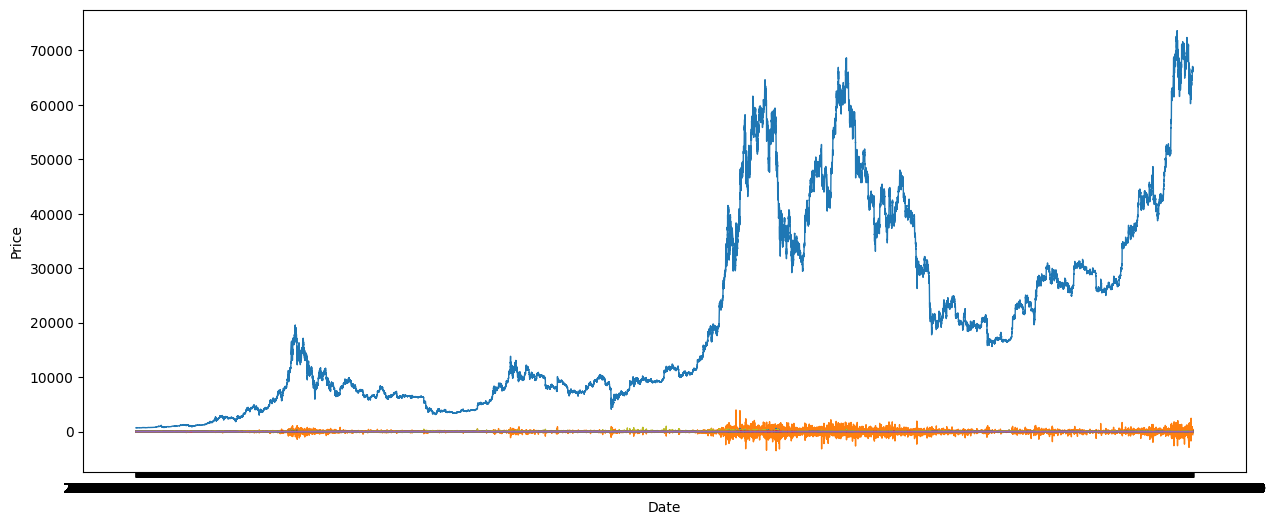

In [ ]:
# Time Series plot
plt.figure(figsize = (15,6))
plt.plot(y,linewidth = 1)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [ ]:
# Import the seaborn library
import seaborn as sns

In [ ]:
# Density Plot
plt.figure(figsize = (15,6))
sns.histplot(y, kde = True)
plt.xlabel('Returns')
plt.ylabel('BTC')
plt.show()

In [ ]:
# Box-plot
plt.figure(figsize = (15,6))
sns.boxplot(x = y.index.date, y = y.returns)
plt.show()

<Figure size 1800x800 with 0 Axes>

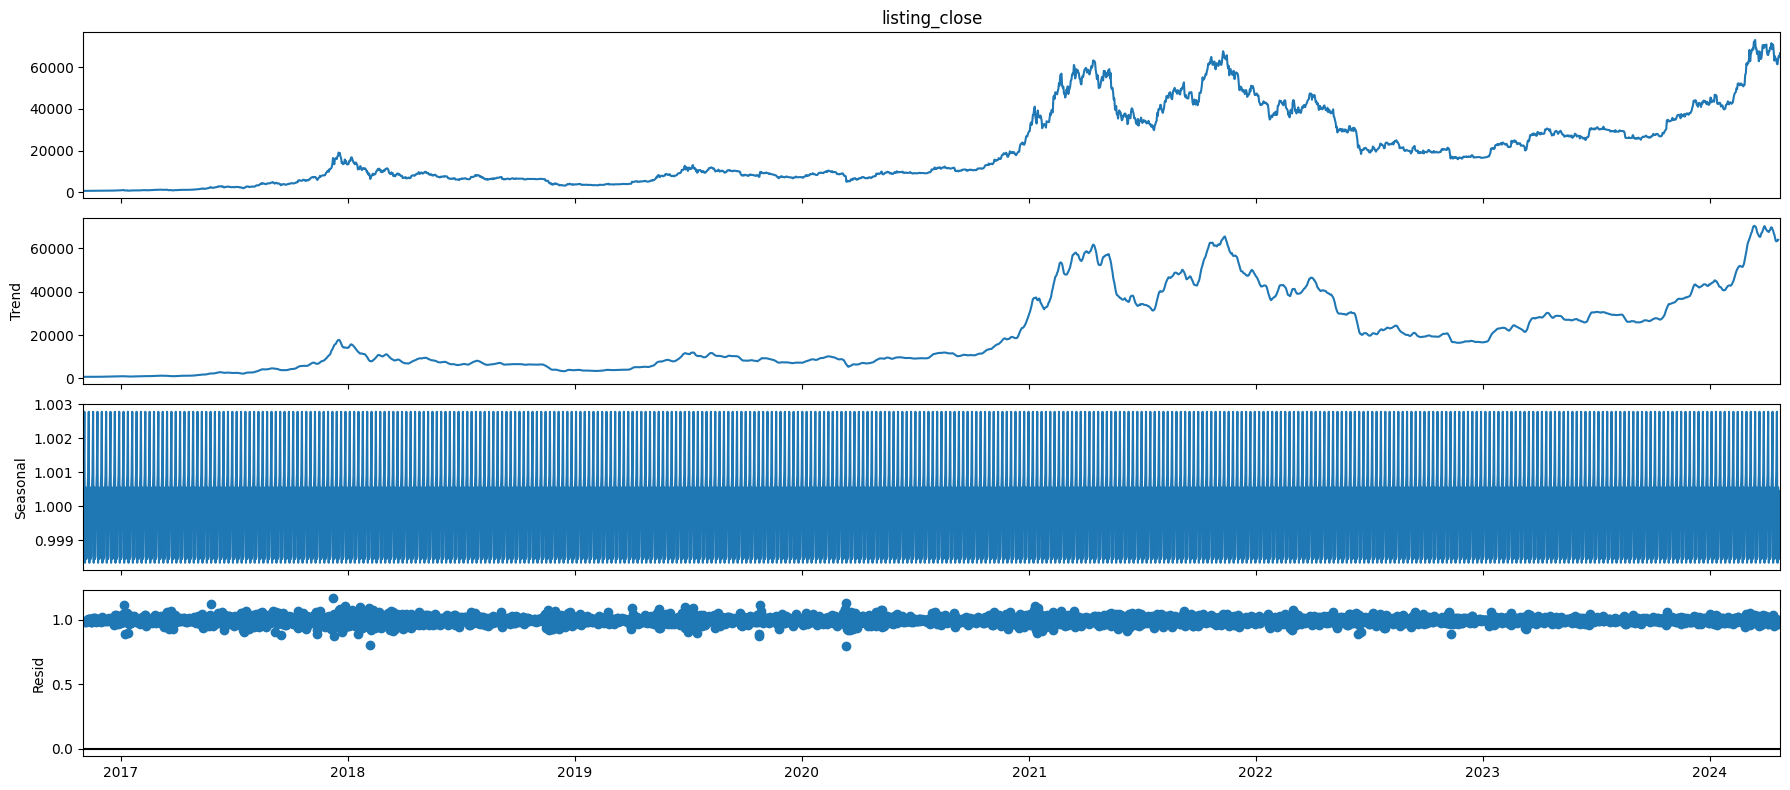

In [ ]:
from pylab import rcParams
import statsmodels.api as sm
import pandas as pd

rcParams['figure.figsize'] = 18,8

# Handle missing values (replace with your preferred method)
# Consider using more robust methods if forward fill is insufficient
y_filled = y.fillna(method='ffill')

# Check if there are still any missing values after filling
if y_filled.isnull().values.any():
    print("Warning: There are still missing values in the data.")
    # Drop rows with any missing values
    y_filled = y_filled.dropna()
    # Or consider alternative imputation techniques

# Check for zero or negative values and adjust accordingly
# Convert relevant columns to numeric before comparison
numeric_columns = y_filled.select_dtypes(include=['number']).columns
for col in numeric_columns:
    if (y_filled[col] <= 0).any():
        print(f"Warning: Zero or negative values encountered in column '{col}'. Shifting data to be positive.")
        y_filled[col] = y_filled[col] + abs(y_filled[col].min()) + 1  # Shift data to be positive

# Set the index to DatetimeIndex if it's not already and infer the frequency
if not isinstance(y_filled.index, pd.DatetimeIndex):
    y_filled.index = pd.to_datetime(y_filled.index)

# Explicitly set frequency if infer_freq fails
# Replace 'D' with the appropriate frequency ('M' for monthly, 'W' for weekly, etc.)
if not y_filled.index.freq:
    y_filled = y_filled.asfreq('D')

# **Check and reset the index if necessary**
if not isinstance(y_filled.index, pd.DatetimeIndex) or y_filled.index.name == 'seasonal':
    # Attempt to infer a datetime index from a suitable column
    date_column = 'Date'  # Replace 'Date' with the actual name of your date column if different
    if date_column in y_filled.columns:
        y_filled = y_filled.set_index(pd.DatetimeIndex(y_filled[date_column]))
        y_filled = y_filled.drop(date_column, axis=1)  # Remove the original date column
    else:
        # If no suitable date column is found, create a default range
        print("Warning: No suitable date column found, using a default range.")
        y_filled.index = pd.date_range(start='2023-01-01', periods=len(y_filled), freq='D')

# Select a single column for decomposition
# Replace 'listing_close' with the actual column you want to decompose
y_filled_single_column = y_filled['listing_close']  # Replace 'listing_close' with the correct column name

# Perform seasonal decomposition, now that the index is a DatetimeIndex with a frequency
decomposition = sm.tsa.seasonal_decompose(y_filled_single_column, model='multiplicative')
plt.figure(figsize=(18, 8))
decomposition.plot()
plt.show()

In [ ]:
from pylab import rcParams
import statsmodels.api as sm
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Import the necessary functions

# ACF & PACF Plots
plt.figure()
plt.subplot(211)
plot_acf(y['returns'], ax=plt.gca(), lags = 30)
plt.subplot(212)
plot_pacf(y['returns'], ax=plt.gca(), lags = 30)
plt.show()

In [ ]:
df = pd.read_excel(r'/content/augmento_btc_returns.xlsx')
df.index = df['date']
df

,date,listing_close,returns,twitter_hacks,twitter_pessimistic_doubtful,twitter_banks,twitter_selling,twitter_market_manipulation,twitter_de_centralisation,twitter_angry,...,reddit_dip,reddit_launch,reddit_fomo_theme,reddit_advice_support,reddit_rebranding,reddit_wallet,reddit_good_news,reddit_problems_and_issues,reddit_mining,reddit_waiting
date,,,,,,,,,,,,,,,,,,,,,
2016-11-01 01:00:00,2016-11-01 01:00:00,706.00,NaN,0,0,0,1,0,0,0,...,0,1,0,13,0,0,4,1,3,3
2016-11-01 02:00:00,2016-11-01 02:00:00,709.99,-0.005636,1,0,0,1,0,1,0,...,0,0,0,10,0,2,1,1,0,1
2016-11-01 03:00:00,2016-11-01 03:00:00,708.54,0.002044,0,0,0,0,0,0,0,...,0,0,0,8,0,2,1,5,3,0
2016-11-01 04:00:00,2016-11-01 04:00:00,702.85,0.008063,0,0,1,0,0,0,0,...,0,0,0,4,0,1,1,0,0,0
2016-11-01 05:00:00,2016-11-01 05:00:00,708.50,-0.008007,0,0,0,0,0,0,0,...,0,0,0,3,0,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-23 11:00:00,2024-04-23 11:00:00,66064.00,0.002464,0,0,0,1,0,0,0,...,0,1,0,28,0,5,15,9,9,0
2024-04-23 12:00:00,2024-04-23 12:00:00,66137.00,-0.001104,0,0,0,0,0,0,0,...,3,1,0,33,0,8,10,5,6,1
2024-04-23 13:00:00,2024-04-23 13:00:00,66544.00,-0.006135,0,1,1,0,0,0,1,...,1,0,0,31,0,8,14,10,5,0


In [ ]:
df = df.dropna(subset=['returns'])

<ipython-input-17-de7c822ce995>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['returns'] = pd.to_numeric(df['returns'], errors='coerce')


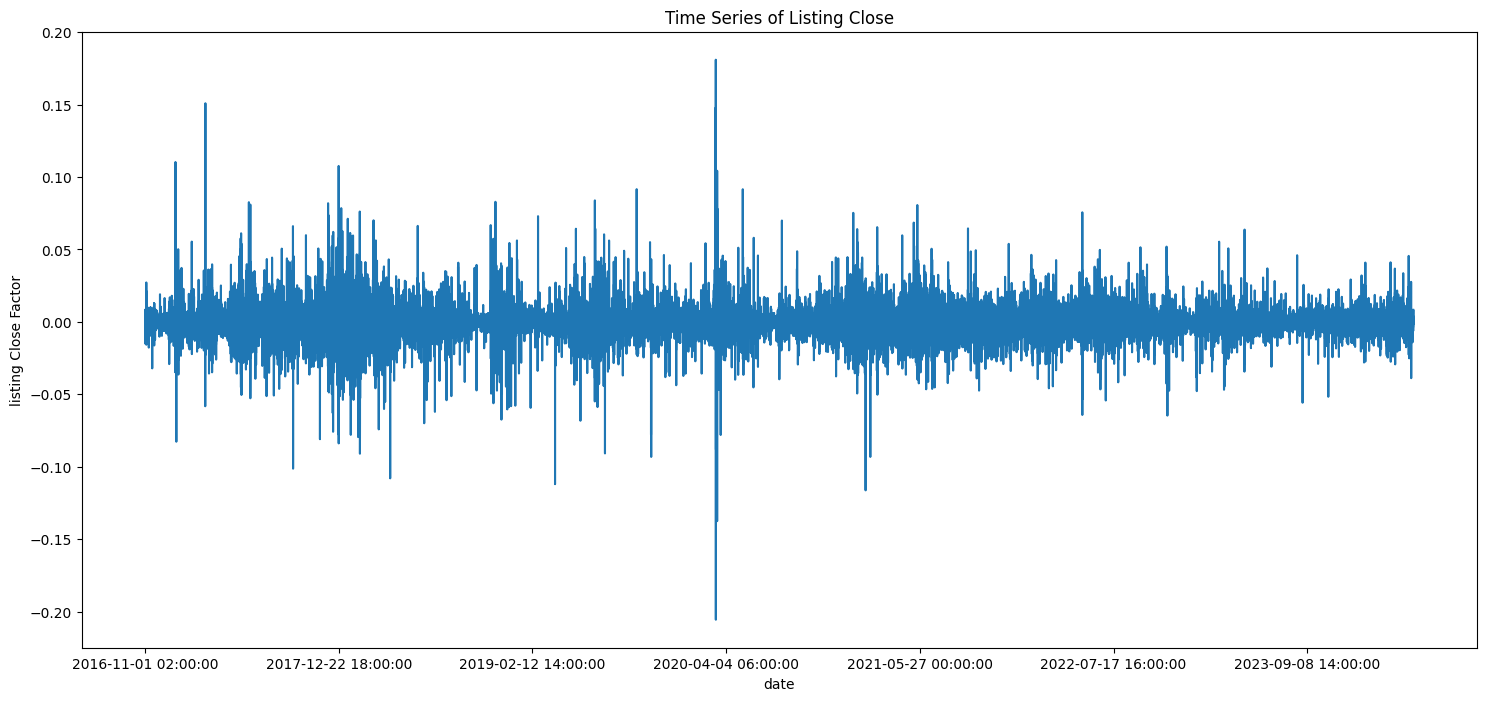

In [ ]:
# Convert 'returns' column to numeric, handling errors
df['returns'] = pd.to_numeric(df['returns'], errors='coerce')

# Drop rows with missing values in 'returns' column
df = df.dropna(subset=['returns'])

#Part - 1
#Plotting the time series of value-weighted monthly factor returns for the Ret factor
df['returns'].plot() # Plot the 'listing_close' column directly, since 'date' is the index
plt.xlabel('date')
plt.ylabel('listing Close Factor')
plt.title('Time Series of Listing Close')
plt.show()

In [ ]:
#Calculating the annualized mean and standard deviation of this return series
annualized_mean = df['returns'].mean() * 12
annualized_std_dev = df['returns'].std() * math.sqrt(12)
print("Annualized Mean of this return series is: "+str(annualized_mean))
print("Annualized Standard Deviation of this return series is: "+str(annualized_std_dev))

Annualized Mean of this return series is: -0.0008324807772963497
Annualized Standard Deviation of this return series is: 0.028586033228501603


In [ ]:
listing_close = df['returns']

In [ ]:
print( listing_close )

date
2016-11-01 02:00:00   -0.005636
2016-11-01 03:00:00    0.002044
2016-11-01 04:00:00    0.008063
2016-11-01 05:00:00   -0.008007
2016-11-01 06:00:00   -0.001129
                         ...   
2024-04-23 11:00:00    0.002464
2024-04-23 12:00:00   -0.001104
2024-04-23 13:00:00   -0.006135
2024-04-23 14:00:00   -0.006038
2024-04-23 15:00:00    0.008310
Name: returns, Length: 65474, dtype: float64


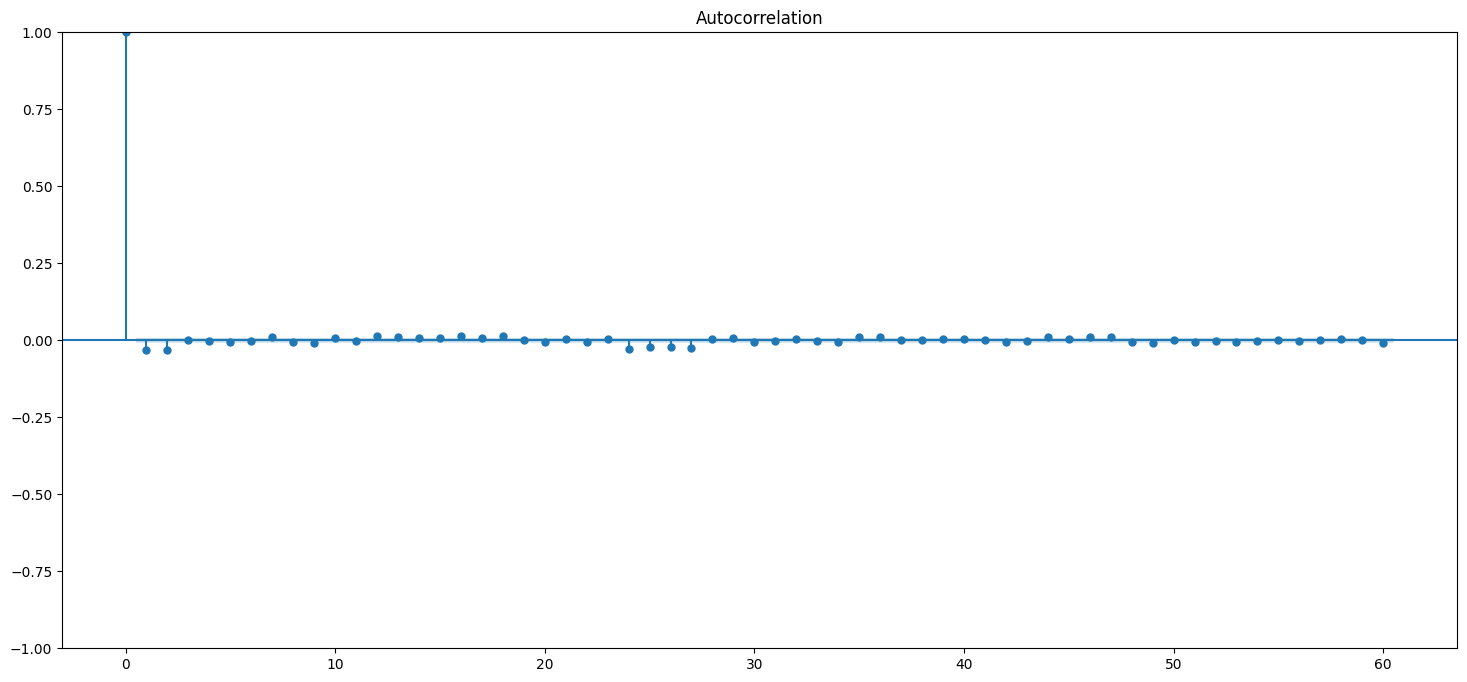

In [ ]:
# Plot the Autocorrelation Function (ACF) with 60 lags
plot_acf(listing_close, lags=60)

# Show the plot
plt.show()

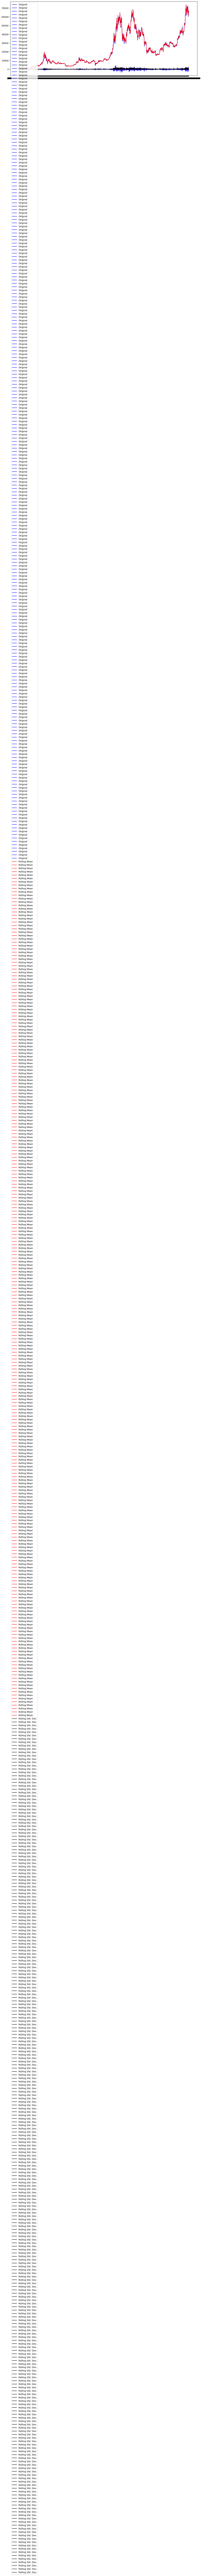

In [ ]:
# Rolling Mean & Rolling Standard Deviation
rolmean = y.rolling(window = 12).mean()
rolstd = y.rolling(window = 12).std()

plt.figure(figsize = (15,6))
orig = plt.plot(y, color = 'blue', label ='Original')
mean  = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
std = plt.plot(rolstd, color = 'black', label = 'Rolling Std. Dev.')
plt.legend(loc = 'best')
plt.show()

Making Time Series Stationary

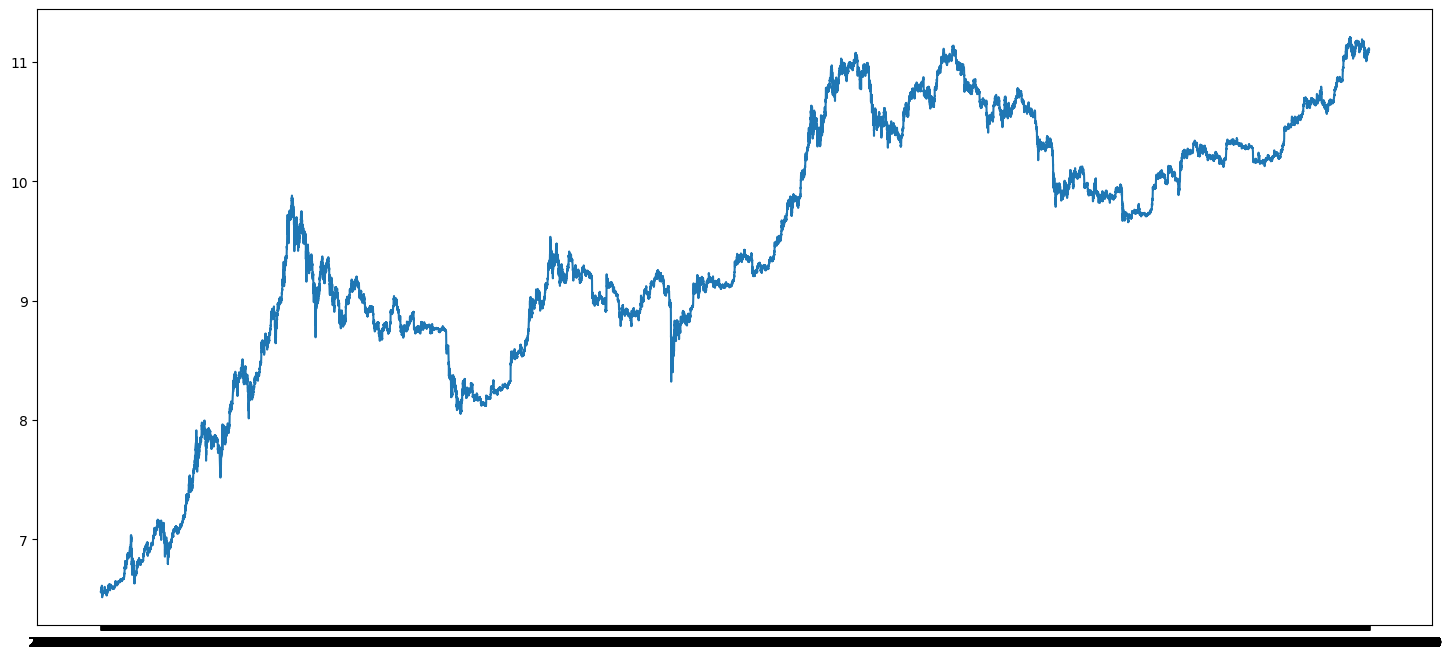

In [ ]:
# Import numpy
import numpy as np

# Log Transformation
ts_log = np.log(y['listing_close']) # Apply log to the 'listing_close' column
plt.plot(ts_log)

In [ ]:
plt.show()

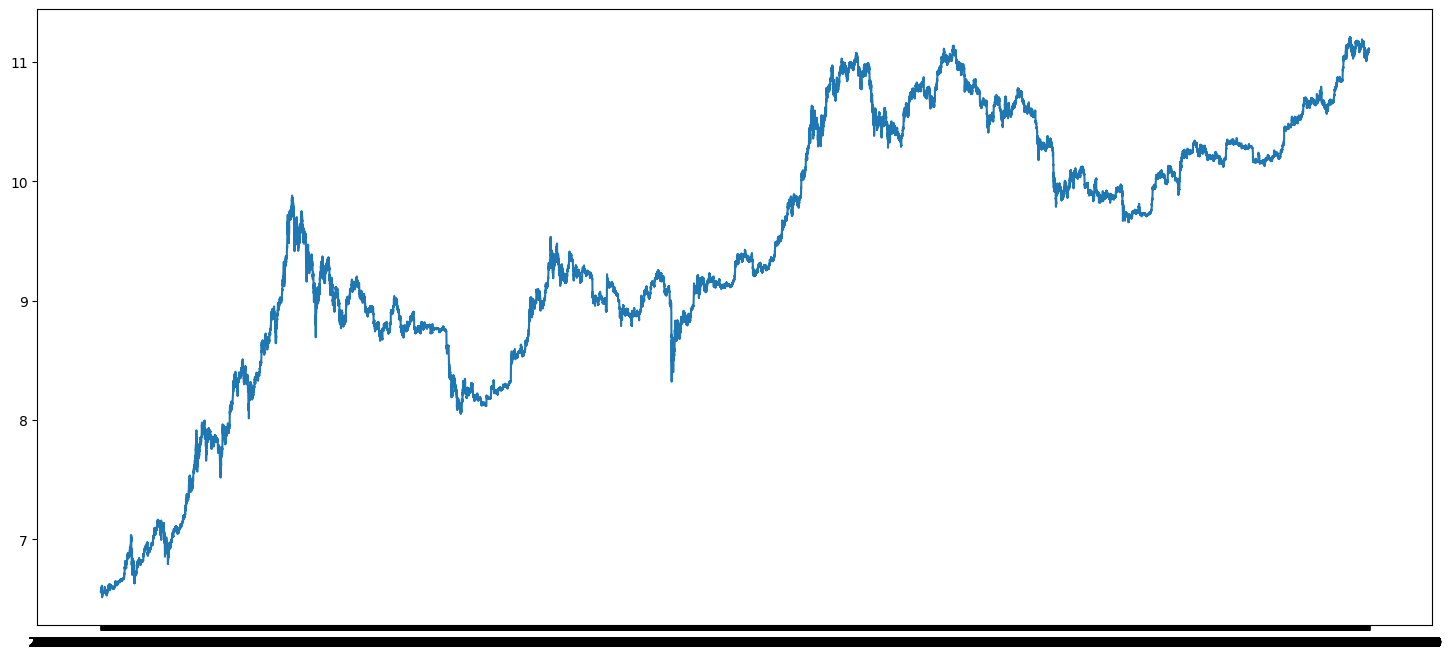

Results of Dickey-Fuller Test:
Test Statistic                    -2.073245
p-value                            0.255408
#Lags Used                        53.000000
Number of Observations Used    65426.000000
Critical Value (1%)               -3.430450
Critical Value (5%)               -2.861584
Critical Value (10%)              -2.566794
dtype: float64


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Define the test_stationarity function if it's not already defined
def test_stationarity(timeseries):
    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    # Drop any missing values before applying the test
    timeseries = timeseries.dropna()
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

# Log Transformation, handling potential zero/negative values
ts_log = np.log(y['listing_close'].replace(0, np.nan).dropna()) # Replace zeros with NaN and drop them
plt.plot(ts_log)
plt.show()

# Stationarity test of log transformed TS
test_stationarity(ts_log)

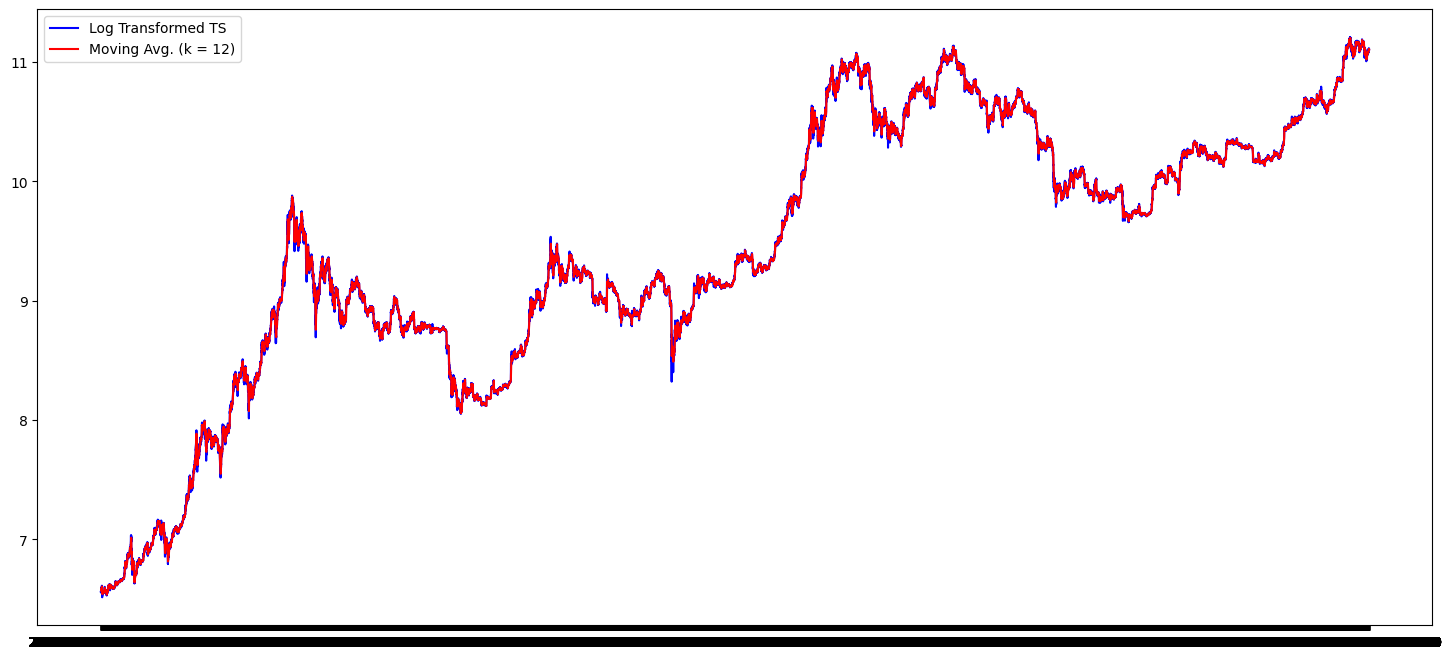

In [ ]:
# Smoothing method : We will subtract Moving Avg. value from log transformed TS and then check its stationarity
mov_avg = ts_log.rolling(window = 12).mean()
plt.plot(ts_log, color = 'blue', label ='Log Transformed TS')
plt.plot(mov_avg, color = 'red', label = 'Moving Avg. (k = 12)')
plt.legend(loc = 'best')
plt.show()

In [ ]:
ts_log_smu = ts_log - mov_avg

In [ ]:
ts_log_smu

date
2016-11-01 01:00:00         NaN
2016-11-01 02:00:00         NaN
2016-11-01 03:00:00         NaN
2016-11-01 04:00:00         NaN
2016-11-01 05:00:00         NaN
                         ...   
2024-04-23 11:00:00   -0.005344
2024-04-23 12:00:00   -0.003090
2024-04-23 13:00:00    0.003395
2024-04-23 14:00:00    0.009070
2024-04-23 15:00:00    0.000876
Name: listing_close, Length: 65480, dtype: float64

In [ ]:
# Removing NA values from differenced TS
ts_log_smu = ts_log_smu.dropna()
ts_log_smu

date
2016-11-01 12:00:00    0.018506
2016-11-01 13:00:00    0.020607
2016-11-01 14:00:00    0.014115
2016-11-01 15:00:00    0.003998
2016-11-01 16:00:00    0.005614
                         ...   
2024-04-23 11:00:00   -0.005344
2024-04-23 12:00:00   -0.003090
2024-04-23 13:00:00    0.003395
2024-04-23 14:00:00    0.009070
2024-04-23 15:00:00    0.000876
Name: listing_close, Length: 65469, dtype: float64

In [ ]:
# Checking stationarity of de-trended log transformed TS
test_stationarity(ts_log_smu)

Results of Dickey-Fuller Test:
Test Statistic                   -35.287611
p-value                            0.000000
#Lags Used                        47.000000
Number of Observations Used    65421.000000
Critical Value (1%)               -3.430450
Critical Value (5%)               -2.861584
Critical Value (10%)              -2.566794
dtype: float64


In [ ]:
# Differencing : on log transformed TS we will use differncing technique
ts_log_diff = ts_log - ts_log.shift(periods = 1) # first differencing

In [ ]:
ts_log_diff

date
2016-11-01 01:00:00         NaN
2016-11-01 02:00:00    0.005636
2016-11-01 03:00:00   -0.002044
2016-11-01 04:00:00   -0.008063
2016-11-01 05:00:00    0.008007
                         ...   
2024-04-23 11:00:00   -0.002464
2024-04-23 12:00:00    0.001104
2024-04-23 13:00:00    0.006135
2024-04-23 14:00:00    0.006038
2024-04-23 15:00:00   -0.008310
Name: listing_close, Length: 65480, dtype: float64

In [ ]:
# dropping NA values from differenced TS
ts_log_diff = ts_log_diff.dropna()

In [ ]:
ts_log_diff

date
2016-11-01 02:00:00    0.005636
2016-11-01 03:00:00   -0.002044
2016-11-01 04:00:00   -0.008063
2016-11-01 05:00:00    0.008007
2016-11-01 06:00:00    0.001129
                         ...   
2024-04-23 11:00:00   -0.002464
2024-04-23 12:00:00    0.001104
2024-04-23 13:00:00    0.006135
2024-04-23 14:00:00    0.006038
2024-04-23 15:00:00   -0.008310
Name: listing_close, Length: 65479, dtype: float64

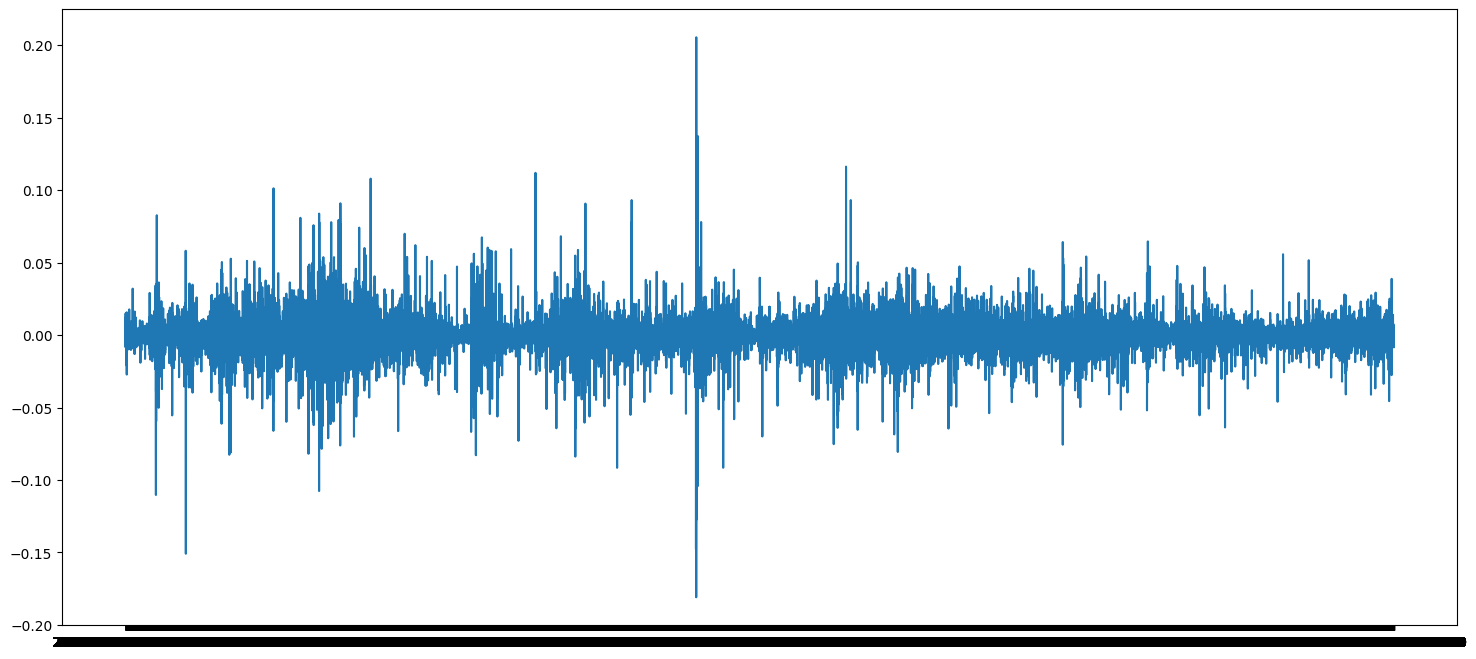

In [ ]:
plt.plot(ts_log_diff)
plt.show()

In [ ]:
# Checking stationarity on log transformed, first differencing TS
test_stationarity(ts_log_diff)

Results of Dickey-Fuller Test:
Test Statistic                   -35.348076
p-value                            0.000000
#Lags Used                        52.000000
Number of Observations Used    65426.000000
Critical Value (1%)               -3.430450
Critical Value (5%)               -2.861584
Critical Value (10%)              -2.566794
dtype: float64


In [ ]:
# Differencing of order 2 on log transformed TS
ts_log_diff2 = ts_log - ts_log.shift(periods = 2)

In [ ]:
ts_log_diff2

date
2016-11-01 01:00:00         NaN
2016-11-01 02:00:00         NaN
2016-11-01 03:00:00    0.003591
2016-11-01 04:00:00   -0.010107
2016-11-01 05:00:00   -0.000056
                         ...   
2024-04-23 11:00:00   -0.000333
2024-04-23 12:00:00   -0.001360
2024-04-23 13:00:00    0.007239
2024-04-23 14:00:00    0.012173
2024-04-23 15:00:00   -0.002272
Name: listing_close, Length: 65480, dtype: float64

In [ ]:
# Dropping NA values
ts_log_diff2 = ts_log_diff2.dropna()

In [ ]:
ts_log_diff2

date
2016-11-01 03:00:00    0.003591
2016-11-01 04:00:00   -0.010107
2016-11-01 05:00:00   -0.000056
2016-11-01 06:00:00    0.009135
2016-11-01 07:00:00    0.016087
                         ...   
2024-04-23 11:00:00   -0.000333
2024-04-23 12:00:00   -0.001360
2024-04-23 13:00:00    0.007239
2024-04-23 14:00:00    0.012173
2024-04-23 15:00:00   -0.002272
Name: listing_close, Length: 65478, dtype: float64

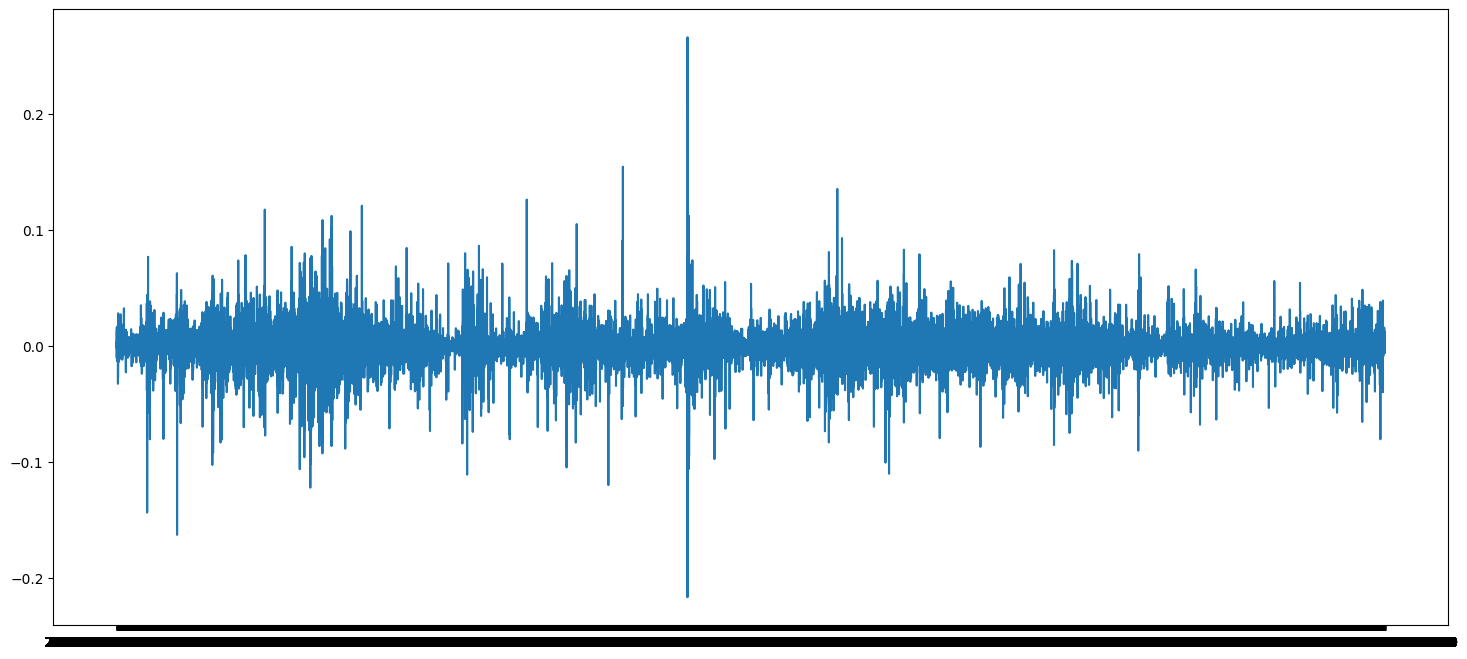

In [ ]:
plt.plot(ts_log_diff2)
plt.show()

In [ ]:
# Checking stationarity of TS of diff. 2
test_stationarity(ts_log_diff2)

Results of Dickey-Fuller Test:
Test Statistic                   -33.038528
p-value                            0.000000
#Lags Used                        61.000000
Number of Observations Used    65416.000000
Critical Value (1%)               -3.430450
Critical Value (5%)               -2.861584
Critical Value (10%)              -2.566794
dtype: float64


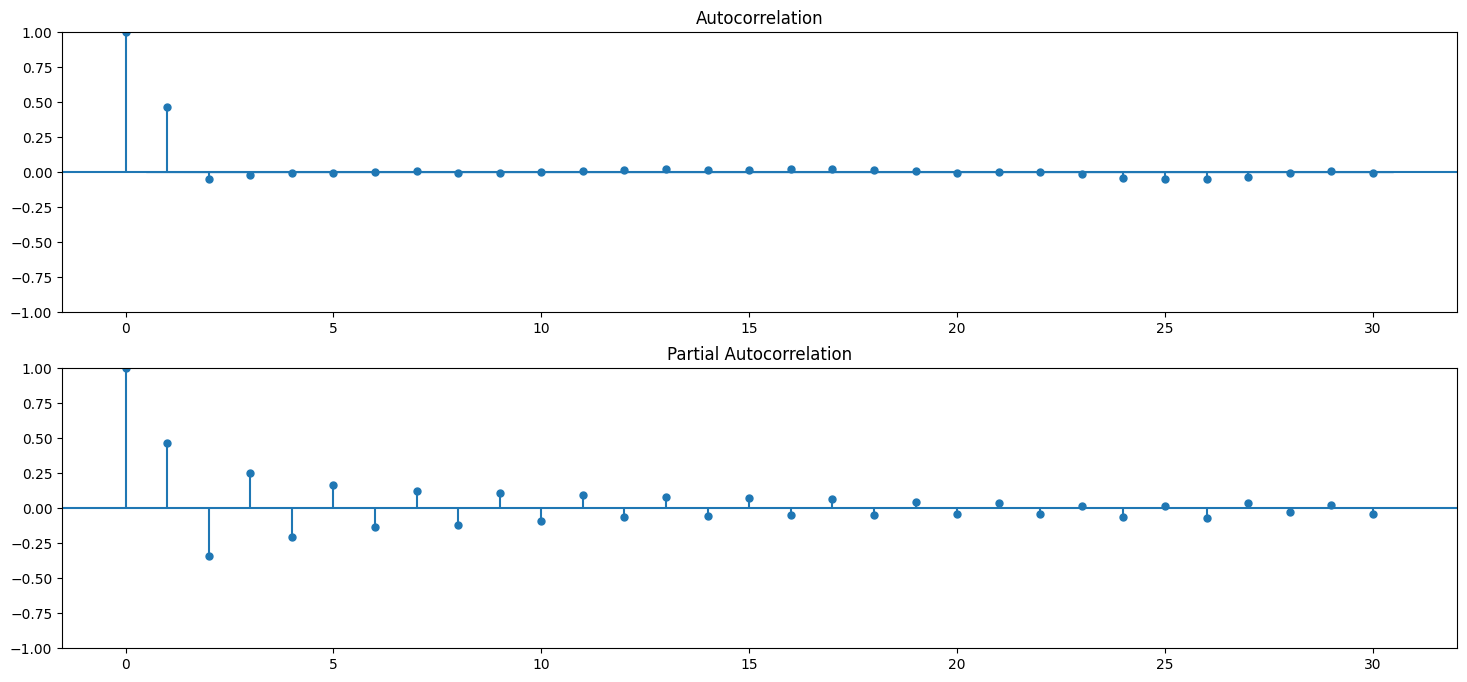

In [ ]:
# Estimating p & q parameters from PACF & ACF plot resp.
plt.figure()
plt.subplot(211)
plot_acf(ts_log_diff2, ax=plt.gca(), lags = 30) # Pass the Series directly to plot_acf
plt.subplot(212)
plot_pacf(ts_log_diff2, ax=plt.gca(), lags = 30) # Pass the Series directly to plot_pacf
plt.show()

In [ ]:
# Seasonal Differencing
ts_log_seasonal_diff = ts_log - ts_log.shift(periods = 12)

In [ ]:
ts_log_seasonal_diff

date
2016-11-01 01:00:00         NaN
2016-11-01 02:00:00         NaN
2016-11-01 03:00:00         NaN
2016-11-01 04:00:00         NaN
2016-11-01 05:00:00         NaN
                         ...   
2024-04-23 11:00:00   -0.011902
2024-04-23 12:00:00   -0.013800
2024-04-23 13:00:00   -0.004199
2024-04-23 14:00:00    0.004356
2024-04-23 15:00:00   -0.001385
Name: listing_close, Length: 65480, dtype: float64

In [ ]:
# Dropping NA values
ts_log_seasonal_diff = ts_log_seasonal_diff.dropna()

In [ ]:
ts_log_seasonal_diff

date
2016-11-01 13:00:00    0.035783
2016-11-01 14:00:00    0.025805
2016-11-01 15:00:00    0.019345
2016-11-01 16:00:00    0.031662
2016-11-01 17:00:00    0.026519
                         ...   
2024-04-23 11:00:00   -0.011902
2024-04-23 12:00:00   -0.013800
2024-04-23 13:00:00   -0.004199
2024-04-23 14:00:00    0.004356
2024-04-23 15:00:00   -0.001385
Name: listing_close, Length: 65468, dtype: float64

In [ ]:
# Checking stationarity of seasonally differenced data
test_stationarity(ts_log_seasonal_diff)

Results of Dickey-Fuller Test:
Test Statistic                   -27.964817
p-value                            0.000000
#Lags Used                        61.000000
Number of Observations Used    65406.000000
Critical Value (1%)               -3.430450
Critical Value (5%)               -2.861584
Critical Value (10%)              -2.566794
dtype: float64


In [ ]:
# Splitting TS data into train and test set for model training and testing
train_ts = ts_log.iloc[0:100,]
test_ts = ts_log.iloc[100: ,]

In [ ]:
# Import the ARIMA class from statsmodels
from statsmodels.tsa.arima.model import ARIMA

# Model 1 : ARIMA(3,2,2)
model1 = ARIMA(train_ts, order = (3,2,2))
results1 = model1.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


In [ ]:
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          listing_close   No. Observations:                  100
Model:                 ARIMA(3, 2, 2)   Log Likelihood                 346.305
Date:                Thu, 11 Jul 2024   AIC                           -680.610
Time:                        13:21:49   BIC                           -665.100
Sample:                    11-01-2016   HQIC                          -674.336
                         - 11-05-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9716      0.584     -1.665      0.096      -2.116       0.172
ar.L2          0.0540      0.174      0.310      0.757      -0.288       0.396
ar.L3          0.1079      0.157      0.687      0.492      -0.200       0.416
ma.L1         -0.1266      0.580     -0.218      0.827      -1.263       1.010
ma.L2         -0.8692      0.703     -1.236      0.216      -2.247       0.509
sigma2      4.763e-05   1.35e-05      3.520      0.000    2.11e-05    7.41e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                14.06
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               2.20   Skew:                            -0.46
Prob(H) (two-sided):                  0.03   Kurtosis:                         4.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
predictions1 = results1.forecast(steps = len(test_ts))

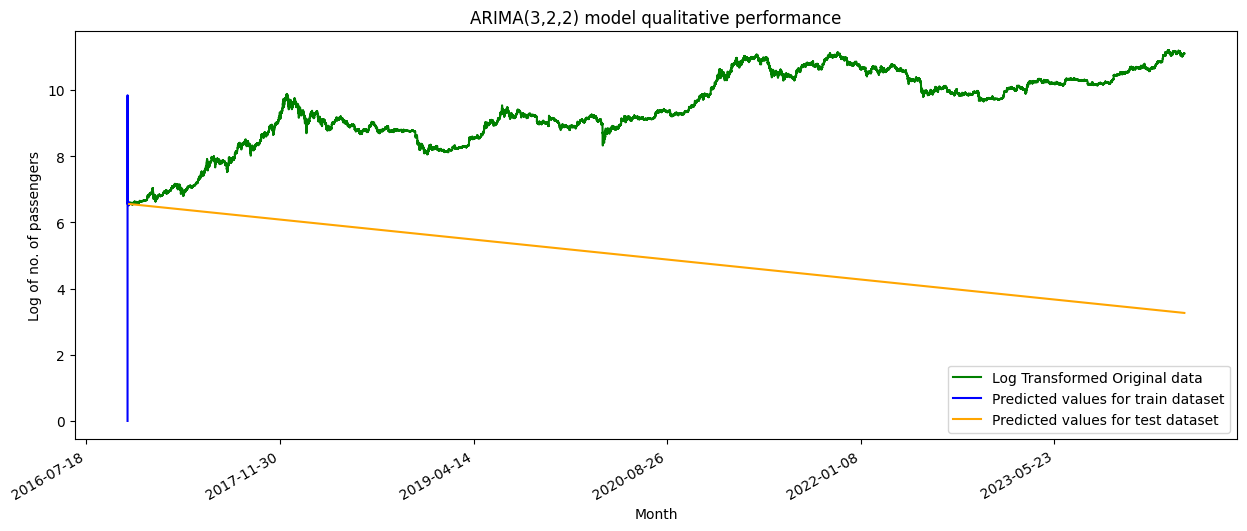

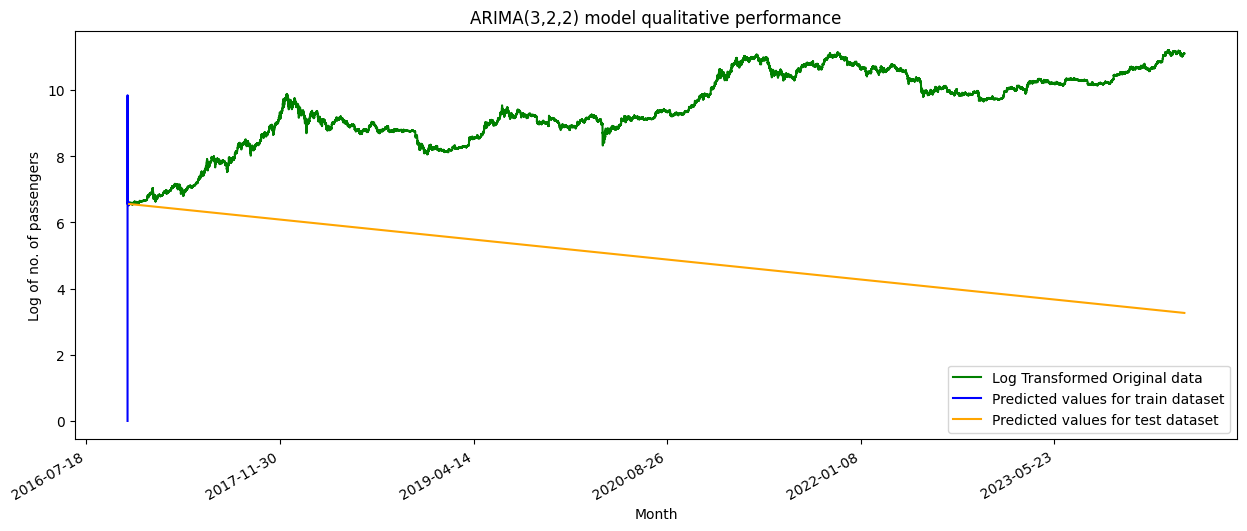

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Ensure the datetime index is correctly set for all series
ts_log.index = pd.to_datetime(ts_log.index)
test_ts.index = pd.to_datetime(test_ts.index)
results1.fittedvalues.index = pd.to_datetime(results1.fittedvalues.index)
predictions1.index = pd.to_datetime(predictions1.index)

# Convert the forecasted values to a pandas Series with a datetime index
predictions1_series = pd.Series(predictions1.values, index=test_ts.index)

# First plot: original vs. fitted vs. predicted values
plt.figure(figsize=(15,6))
plt.plot(mdates.date2num(ts_log.index), ts_log.values, color='green', label='Log Transformed Original data')
plt.plot(mdates.date2num(results1.fittedvalues.index), results1.fittedvalues.values, color='blue', label='Predicted values for train dataset')
plt.plot(mdates.date2num(predictions1_series.index), predictions1_series.values, color='orange', label='Predicted values for test dataset')
plt.xlabel('Month')
plt.ylabel('Log of no. of passengers')
plt.title('ARIMA(3,2,2) model qualitative performance')
plt.legend(loc='best')
# Format x-axis to display dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate() # Auto-format dates for better readability
plt.show()

# Second plot: original vs. fitted vs. series of predicted values
plt.figure(figsize=(15,6))
plt.plot(mdates.date2num(ts_log.index), ts_log.values, color='green', label='Log Transformed Original data')
plt.plot(mdates.date2num(results1.fittedvalues.index), results1.fittedvalues.values, color='blue', label='Predicted values for train dataset')
plt.plot(mdates.date2num(predictions1_series.index), predictions1_series.values, color='orange', label='Predicted values for test dataset')
plt.xlabel('Month')
plt.ylabel('Log of no. of passengers')
plt.title('ARIMA(3,2,2) model qualitative performance')
plt.legend(loc='best')
# Format x-axis to display dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate() # Auto-format dates for better readability
plt.show()
